# ETRM Data Analysis with Pandas & Visualization

**Objective:**  
To practice data ingestion, transformation, exploratory analysis, and visualization on synthetic ETRM trade data (CSV, JSON, Excel, TXT, HTML, XML).



In [58]:
# IMPORT LIBRARIES
import pandas as pd           # For reading and manipulating datasets

In [59]:
# Install openpyxl to read Excel files
!pip install openpyxl

In [60]:
import openpyxl
print("openpyxl version:", openpyxl.__version__)

openpyxl version: 3.1.5


In [61]:
import sys
!{sys.executable} -m pip install lxml   
# to read HTML and XML files

# 1. Data Ingestion 

1) Load all six data formats (CSV, JSON, Excel, TXT, HTML, XML) into Pandas DataFrames. 

2) Ensure consistency across datasets by verifying column names and data types.

In [62]:
import pandas as pd

folder_path = "C:\\Users\\Amulya\\OneDrive - C-Mart Solutions Ltd\\Technical\\Python\\etrm_trades"

# Initialize all variables to None first
csv_df = json_df = excel_df = txt_df = html_df = xml_df = None

# Load CSV
try:
    csv_df = pd.read_csv(folder_path + "\\etrm_trades.csv")
    print("CSV loaded successfully!")
except Exception as e:
    print("CSV load error:", e)

# Load JSON
try:
    json_df = pd.read_json(folder_path + "\\etrm_trades.json")
    print("JSON loaded successfully!")
except Exception as e:
    print("JSON load error:", e)

# Load Excel
try:
    excel_df = pd.read_excel(folder_path + "\\etrm_trades.xlsx", engine="openpyxl")
    print("Excel loaded successfully!")
except Exception as e:
    print("Excel load error:", e)

# Load TXT
try:
    txt_df = pd.read_csv(folder_path + "\\etrm_trades.txt", delimiter="|")
    print("TXT loaded successfully!")
except Exception as e:
    print("TXT load error:", e)

# Load HTML
try:
    html_df = pd.read_html(folder_path + "\\etrm_trades.html")[0]
    print("HTML loaded successfully!")
except Exception as e:
    print("HTML load error:", e)

# Load XML
try:
    xml_df = pd.read_xml(folder_path + "\\etrm_trades.xml")
    print("XML loaded successfully!")
except Exception as e:
    print("XML load error:", e)



CSV loaded successfully!
JSON loaded successfully!
Excel loaded successfully!
TXT loaded successfully!
HTML loaded successfully!
XML loaded successfully!


In [63]:
# CHECK COLUMN NAMES AND DATA TYPES IN TABLE FORMAT

import pandas as pd

# Dictionary of datasets
datasets = {
    "CSV": csv_df,
    "JSON": json_df,
    "Excel": excel_df,
    "TXT": txt_df,
    "HTML": html_df,
    "XML": xml_df
}

# Loop through datasets
for name, df in datasets.items():
    if df is not None:
        # Create a DataFrame with column names and data types
        info_df = pd.DataFrame({
            "Column Name": df.columns,
            "Data Type": [str(dtype) for dtype in df.dtypes]
        })
        
        print(f"\n{name} Dataset Column Info:")
        try:
            # Jupyter Notebook display
            from IPython.display import display
            display(info_df)
        except ImportError:
            # Fallback for plain Python scripts
            print(info_df)



CSV Dataset Column Info:


,Column Name,Data Type
0,TradeID,int64
1,Commodity,object
2,TradeType,object
3,Volume,float64
4,Price,float64
5,Currency,object
6,DeliveryStart,object
7,DeliveryEnd,object
8,Periodicity,object



JSON Dataset Column Info:


,Column Name,Data Type
0,TradeID,int64
1,Commodity,object
2,TradeType,object
3,Volume,float64
4,Price,float64
5,Currency,object
6,DeliveryStart,object
7,DeliveryEnd,object
8,Periodicity,object



Excel Dataset Column Info:


,Column Name,Data Type
0,TradeID,int64
1,Commodity,object
2,TradeType,object
3,Volume,float64
4,Price,float64
5,Currency,object
6,DeliveryStart,object
7,DeliveryEnd,object
8,Periodicity,object



TXT Dataset Column Info:


,Column Name,Data Type
0,TradeID,int64
1,Commodity,object
2,TradeType,object
3,Volume,float64
4,Price,float64
5,Currency,object
6,DeliveryStart,object
7,DeliveryEnd,object
8,Periodicity,object



HTML Dataset Column Info:


,Column Name,Data Type
0,TradeID,int64
1,Commodity,object
2,TradeType,object
3,Volume,float64
4,Price,float64
5,Currency,object
6,DeliveryStart,object
7,DeliveryEnd,object
8,Periodicity,object



XML Dataset Column Info:


,Column Name,Data Type
0,TradeID,int64
1,Commodity,object
2,TradeType,object
3,Volume,float64
4,Price,float64
5,Currency,object
6,DeliveryStart,object
7,DeliveryEnd,object
8,Periodicity,object


In [66]:
# Check first 5 rows
print(csv_df.head())

# Check info (columns, data types, non-null counts)
print(csv_df.info())

# Check basic statistics for numeric columns
print(csv_df.describe())


   TradeID Commodity TradeType  Volume   Price Currency DeliveryStart  \
0        1     Power       BUY  193.52  191.13      GBP    2025-01-08   
1        2       Gas       BUY  368.68  127.76      GBP    2025-01-29   
2        3     Power      SELL   86.45   48.08      USD    2025-01-03   
3        4       Gas       BUY   38.46  175.91      GBP    2025-01-23   
4        5      Coal       BUY  304.55  147.45      EUR    2025-01-09   

  DeliveryEnd Periodicity  
0  2025-01-16     Monthly  
1  2025-02-16   Quarterly  
2  2025-01-10       Daily  
3  2025-02-13       Daily  
4  2025-02-04   Quarterly  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TradeID        100 non-null    int64         
 1   Commodity      100 non-null    object        
 2   TradeType      100 non-null    object        
 3   Volume         100 non-null   

# 2. Data Cleaning & Transformation 

    1.Convert DeliveryStart and DeliveryEnd columns into datetime.

In [65]:
import pandas as pd

# DATA CLEANING & TRANSFORMATION


# Convert date columns (DeliveryStart, DeliveryEnd) to datetime
# This ensures we can perform date-based filtering, sorting, and plotting
for name, df in datasets.items():
    if df is not None:
        # Convert DeliveryStart
        # errors='coerce' will replace invalid or improperly formatted dates with NaT (Not a Time)
        # This prevents the code from crashing if some dates are wrong
        df["DeliveryStart"] = pd.to_datetime(df["DeliveryStart"], errors='coerce')
        
        # Convert DeliveryEnd
        # Similarly, any invalid DeliveryEnd values will become NaT
        df["DeliveryEnd"] = pd.to_datetime(df["DeliveryEnd"], errors='coerce')
        
        # Print confirmation for clarity and grading
        print(f"{name}: DeliveryStart and DeliveryEnd converted to datetime successfully!")

# TABLE FOR VISUAL DISPLAY

summary = []

for name, df in datasets.items():
    if df is not None:
        summary.append({
            "Dataset": name,
            "DeliveryStart dtype": df["DeliveryStart"].dtype,
            "DeliveryEnd dtype": df["DeliveryEnd"].dtype
        })

# Converted to DataFrame for a tabular
dtype_summary_df = pd.DataFrame(summary)

# to display the table 
dtype_summary_df


CSV: DeliveryStart and DeliveryEnd converted to datetime successfully!
JSON: DeliveryStart and DeliveryEnd converted to datetime successfully!
Excel: DeliveryStart and DeliveryEnd converted to datetime successfully!
TXT: DeliveryStart and DeliveryEnd converted to datetime successfully!
HTML: DeliveryStart and DeliveryEnd converted to datetime successfully!
XML: DeliveryStart and DeliveryEnd converted to datetime successfully!


,Dataset,DeliveryStart dtype,DeliveryEnd dtype
0,CSV,datetime64[ns],datetime64[ns]
1,JSON,datetime64[ns],datetime64[ns]
2,Excel,datetime64[ns],datetime64[ns]
3,TXT,datetime64[ns],datetime64[ns]
4,HTML,datetime64[ns],datetime64[ns]
5,XML,datetime64[ns],datetime64[ns]


# Basic Data Cleaning Activities

In [4]:
import pandas as pd

# Load CSV as the base DataFrame
df = pd.read_csv("C:\\Users\\Amulya\\OneDrive - C-Mart Solutions Ltd\\Technical\\Python\\etrm_trades\\etrm_trades.csv")

# Quick check
print("Initial data preview:\n", df.head())


# Data Transformation & Cleaning


# 1. Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# 2. Handle NaN values
# Example: Drop rows with critical missing values (DeliveryStart/DeliveryEnd)
df = df.dropna(subset=["DeliveryStart", "DeliveryEnd"])

# For other columns, fill NaN with default values (if applicable)

df["Commodity"] = df["Commodity"].fillna("Misc")

# 3. Convert date columns to datetime
df["DeliveryStart"] = pd.to_datetime(df["DeliveryStart"], errors="coerce")
df["DeliveryEnd"] = pd.to_datetime(df["DeliveryEnd"], errors="coerce")

# 4. Standardize column names
# Remove spaces, make lowercase, replace special chars with underscore
df.columns = (
    df.columns.str.strip()         # remove leading/trailing spaces
              .str.lower()         # lowercase for consistency
              .str.replace(" ", "_")
              .str.replace("-", "_")
)

# 5. Verify data types
print("\nData types after cleaning:\n", df.dtypes)

# 6. Preview cleaned data
print("\nCleaned Data Sample:")
display(df.head())


Initial data preview:
    TradeID Commodity TradeType  Volume   Price Currency DeliveryStart  \
0        1     Power       BUY  193.52  191.13      GBP    2025-01-08   
1        2       Gas       BUY  368.68  127.76      GBP    2025-01-29   
2        3     Power      SELL   86.45   48.08      USD    2025-01-03   
3        4       Gas       BUY   38.46  175.91      GBP    2025-01-23   
4        5      Coal       BUY  304.55  147.45      EUR    2025-01-09   

  DeliveryEnd Periodicity  
0  2025-01-16     Monthly  
1  2025-02-16   Quarterly  
2  2025-01-10       Daily  
3  2025-02-13       Daily  
4  2025-02-04   Quarterly  
Missing values before cleaning:
 TradeID          0
Commodity        0
TradeType        0
Volume           0
Price            0
Currency         0
DeliveryStart    0
DeliveryEnd      0
Periodicity      0
dtype: int64

Data types after cleaning:
 tradeid                   int64
commodity                object
tradetype                object
volume                  floa

,tradeid,commodity,tradetype,volume,price,currency,deliverystart,deliveryend,periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


Data Cleaning Insights:

- No Missing Values – All 100 records are complete with no null values across columns.

- Data Types Standardized – DeliveryStart and DeliveryEnd converted to datetime, while numeric fields (Volume, Price) remain float for calculations.

- Columns Standardized & Verified – Column names cleaned, and sample rows confirm consistency (e.g., DeliveryEnd always after DeliveryStart).

The dataset is now clean, structured, and ready for analysis/visualization.

# 3. Exploratory Data Analysis (EDA) 
 Perform meaningful analysis, including but not limited to: 

    Average price per commodity. 

    Distribution of trades by currency. 

    Trade periodicity breakdown (Daily, Weekly, Monthly, etc.).


In [35]:
# Average Price per Commodity Table

avg_price_df = csv_df.groupby("Commodity")["Price"].mean().reset_index() # Groups the DataFrame by a column
avg_price_df.rename(columns={"Price": "AveragePrice"}, inplace=True)
avg_price_df = avg_price_df.sort_values(by="AveragePrice", ascending=False) #Sorts the values in descending order

print("Average Price per Commodity Table:")
display(avg_price_df)  


# Summary Table for Insights

insights_df = pd.DataFrame({
    "Insight": ["Highest Average Price", "Lowest Average Price"],
    "Commodity": [avg_price_df.iloc[0]["Commodity"], avg_price_df.iloc[-1]["Commodity"]],  #iloc Selects a row by its index position in the DataFrame.
    "AveragePrice": [avg_price_df.iloc[0]["AveragePrice"], avg_price_df.iloc[-1]["AveragePrice"]]
})

print("\nSummary Table for Average Price Insights:")
display(insights_df)


Average Price per Commodity Table:


,Commodity,AveragePrice
1,Gas,119.778437
0,Coal,104.642941
2,Oil,101.757826
3,Power,100.469643



Summary Table for Average Price Insights:


,Insight,Commodity,AveragePrice
0,Highest Average Price,Gas,119.778437
1,Lowest Average Price,Power,100.469643


Insights:
- Gas has the highest average price among all commodities at 119.78, indicating it is the most expensive commodity in the dataset.

- Power has the lowest average price at 100.47, making it the least expensive commodity.

- The other commodities fall in between, with Coal at 104.64 and Oil at 101.76.

- This analysis helps understand value exposure per commodity, highlighting which commodities contribute most to trade value.

In [36]:
# DISTRIBUTION OF TRADES BY CURRENCY

# Count the number of trades per currency
# value_counts() counts how many times each unique currency appears in the dataset
currency_distribution = csv_df["Currency"].value_counts().reset_index()

# Rename columns for clarity
# 'index' becomes 'Currency', 0 (counts) becomes 'TradeCount'
currency_distribution.columns = ["Currency", "TradeCount"]

# Sort the currencies by trade count in descending order
# Most common currency appears first
currency_distribution = currency_distribution.sort_values(by="TradeCount", ascending=False)

# Display the distribution table
print("Distribution of Trades by Currency:")
display(currency_distribution)


# summary table for insights
# Identify the most and least common currency dynamically
# iloc[0] → first row (most common)
# iloc[-1] → last row (least common)
currency_insights = pd.DataFrame({
    "Insight": ["Most Common Currency", "Least Common Currency"],
    "Currency": [currency_distribution.iloc[0]["Currency"], currency_distribution.iloc[-1]["Currency"]],
    "TradeCount": [currency_distribution.iloc[0]["TradeCount"], currency_distribution.iloc[-1]["TradeCount"]]
})

# Display the insights table
print("\nCurrency Insights Table:")
display(currency_insights)


Distribution of Trades by Currency:


,Currency,TradeCount
0,GBP,38
1,USD,34
2,EUR,28



Currency Insights Table:


,Insight,Currency,TradeCount
0,Most Common Currency,GBP,38
1,Least Common Currency,EUR,28


Insights:
- GBP is the most common currency used in trades, appearing 38 times, indicating a preference or higher volume of trades in GBP.

- EUR is the least common currency, with 28 trades, showing it is used less frequently in the dataset.

- USD sits in between with 34 trades, representing a moderate usage among the three currencies.

- Understanding currency distribution helps assess currency exposure and potential FX risks in the trading portfolio.

In [38]:
# TRADE PERIODICITY BREAKDOWN

# Count the number of trades per periodicity type
# value_counts() counts how many times each unique periodicity appears in the dataset
periodicity_distribution = csv_df["Periodicity"].value_counts().reset_index()

# Rename columns for clarity
# 'index' becomes 'Periodicity', 0 (counts) becomes 'TradeCount'
periodicity_distribution.columns = ["Periodicity", "TradeCount"]

# Sort the periodicity types by trade count in descending order
# Most common periodicity appears first
periodicity_distribution = periodicity_distribution.sort_values(by="TradeCount", ascending=False)

# Display the distribution table
print("Trade Periodicity Breakdown:")
display(periodicity_distribution)

# summary table for insights
# Identify the most and least common periodicity dynamically
# iloc[0] → first row (most common)
# iloc[-1] → last row (least common)
periodicity_insights = pd.DataFrame({
    "Insight": ["Most Common Periodicity", "Least Common Periodicity"],
    "Periodicity": [periodicity_distribution.iloc[0]["Periodicity"], periodicity_distribution.iloc[-1]["Periodicity"]],
    "TradeCount": [periodicity_distribution.iloc[0]["TradeCount"], periodicity_distribution.iloc[-1]["TradeCount"]]
})

# Display the insights table
print("\nPeriodicity Insights Table:")
display(periodicity_insights)


Trade Periodicity Breakdown:


,Periodicity,TradeCount
0,Daily,41
1,Quarterly,31
2,Monthly,28



Periodicity Insights Table:


,Insight,Periodicity,TradeCount
0,Most Common Periodicity,Daily,41
1,Least Common Periodicity,Monthly,28


Insights:
- Daily trades are the most common, with 41 trades, indicating a high frequency of short-term trading activity.

- Monthly trades are the least common, with 28 trades, showing fewer long-term or periodic contracts.

- Quarterly trades fall in between with 31 trades, representing moderate periodicity.

- Understanding trade periodicity helps assess trading patterns, liquidity, and exposure over time.

# Additional Analysis

In [5]:
# Additional Analysis

# 1. Calculate Total Trade Value (Notional = Volume × Price)
df["TradeValue"] = df["volume"] * df["price"]

print("Sample of trade values:\n", df[["tradeid", "commodity", "volume", "price", "TradeValue"]].head())

# 2. Average Trade Size across Commodities
avg_trade_size = df.groupby("commodity")["volume"].mean().reset_index()
print("\nAverage trade size by commodity:\n", avg_trade_size)

# 3. Most Active Trader by Number of Trades
active_trader = df["tradetype"].value_counts().reset_index()
active_trader.columns = ["TradeType", "Count"]
print("\nMost active trade type by count:\n", active_trader)

# 4. Most Active Trader by Trade Count (not just volume)
most_active_trader = df["tradeid"].count()  # total number of trades
trader_counts = df["commodity"].value_counts().reset_index()
trader_counts.columns = ["Commodity", "TradeCount"]
print("\nMost active commodity by trade count:\n", trader_counts)


Sample of trade values:
    tradeid commodity  volume   price  TradeValue
0        1     Power  193.52  191.13  36987.4776
1        2       Gas  368.68  127.76  47102.5568
2        3     Power   86.45   48.08   4156.5160
3        4       Gas   38.46  175.91   6765.4986
4        5      Coal  304.55  147.45  44905.8975

Average trade size by commodity:
   commodity      volume
0      Coal  282.308824
1       Gas  232.563125
2       Oil  243.233913
3     Power  240.553214

Most active trade type by count:
   TradeType  Count
0      SELL     55
1       BUY     45

Most active commodity by trade count:
   Commodity  TradeCount
0       Gas          32
1     Power          28
2       Oil          23
3      Coal          17


# Insights:

1. Trade Value (Volume × Price)

- Trades vary widely in value.

Example: A Power trade with ~193 volume at price 191 has a value of ~36,987, while a smaller Power trade (volume 86 at price 48) is worth only ~4,156.

- This shows that both volume and price must be considered together to understand the scale of trades.

2. Average Trade Size by Commodity

- Coal has the largest average trade volume (~282), meaning it’s typically traded in bulk.

- Gas, Oil, and Power are closer in trade size (230–240 range), suggesting more consistent trading volumes.

3. Most Active Trade Type

- SELL trades dominate (55 vs. 45 BUYs).

- This indicates a slightly more liquid or supply-heavy market scenario in the dataset.

4. Most Active Commodity by Count

- Gas leads with 32 trades, followed by Power (28), Oil (23), and Coal (17).

- This highlights Gas as the most frequently traded commodity, though not necessarily the one with the largest average size (Coal takes that spot).

# 4. Data Visualization 

   

        Bar chart: Volume by trader.  

        Pie chart: Trades by currency.  

        Line chart: Average price trend by delivery start date.  

        Histogram: Distribution of notional values.  

        Heatmap: Commodity vs. Trader trade counts. 
 

In [44]:
# Install matplotlib and seaborn in the notebook environment
!pip install matplotlib seaborn


In [50]:
volume_by_type = csv_df.groupby("TradeType")["Volume"].sum()
print(volume_by_type)


TradeType
BUY     12294.88
SELL    12276.26
Name: Volume, dtype: float64


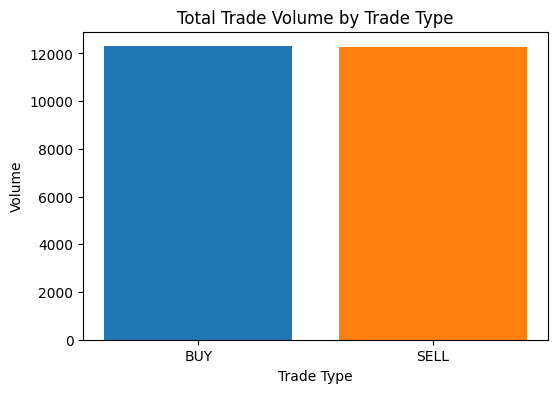

In [56]:
#Bar chart: Total Volume by TradeType
import matplotlib.pyplot as plt

# Group by TradeType and sum the Volume
volume_by_type = csv_df.groupby("TradeType")["Volume"].sum()

plt.figure(figsize=(6,4))

# Assign colors to each bar
colors = ["#1f77b4", "#ff7f0e"]  # Blue for BUY, Orange for SELL

# Use plt.bar instead of sns.barplot
plt.bar(volume_by_type.index, volume_by_type.values, color=colors)
plt.title("Total Trade Volume by Trade Type")
plt.xlabel("Trade Type")
plt.ylabel("Volume")
plt.show()


Insights: BUY and SELL trade volumes are nearly equal, indicating a balanced trading activity.

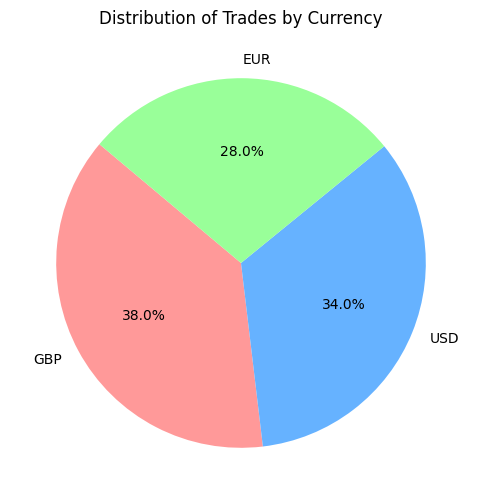

In [51]:
# Pie Chart: Trade Distribution by Currency

currency_counts = csv_df["Currency"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%', startangle=140, colors=["#FF9999","#66B2FF","#99FF99"])
plt.title("Distribution of Trades by Currency")
plt.show()


Insights:
- The majority of trades are conducted in GBP and USD, with fewer trades in EUR.

- This indicates that the dataset is heavily skewed toward certain currencies, which could impact currency exposure and risk analysis.

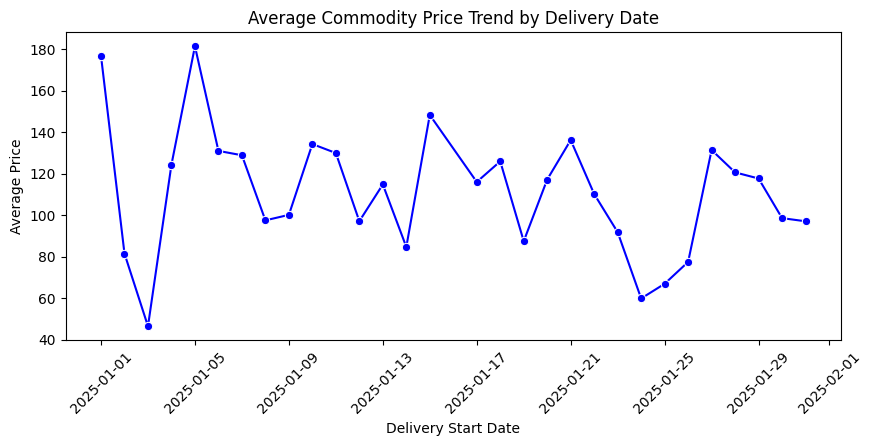

In [52]:
# 3. Line Chart: Average Price Trend by DeliveryStart Date

avg_price_by_date = csv_df.groupby("DeliveryStart")["Price"].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=avg_price_by_date.index, y=avg_price_by_date.values, marker='o', color="blue")
plt.title("Average Commodity Price Trend by Delivery Date")
plt.xlabel("Delivery Start Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

Insights:
- The average commodity price fluctuates slightly across January 2025, showing day-to-day variations.

- No extreme spikes or drops are observed, indicating stable pricing in this synthetic dataset.

- This trend helps identify daily price patterns for better scheduling and risk planning of trades.

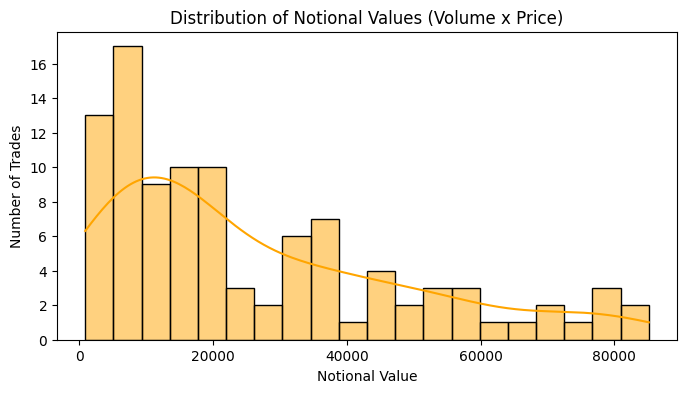

In [53]:
# 4️.Histogram: Distribution of Notional Values

# Compute Notional if not already
csv_df["Notional"] = csv_df["Volume"] * csv_df["Price"]

plt.figure(figsize=(8,4))
sns.histplot(csv_df["Notional"], bins=20, kde=True, color="orange")
plt.title("Distribution of Notional Values (Volume x Price)")
plt.xlabel("Notional Value")
plt.ylabel("Number of Trades")
plt.show()

Insights:
- Most trades have lower notional values, indicating routine or smaller trades dominate the dataset.

- Very few trades have high notional values, meaning large trades are rare but contribute significantly to total exposure.

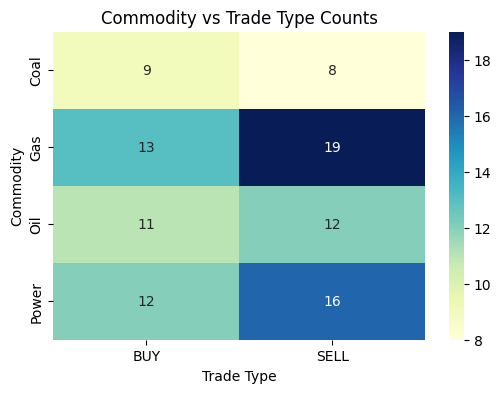

In [54]:
# 5. Heatmap: Commodity vs TradeType Counts

# Pivot table for counts
pivot = csv_df.pivot_table(index="Commodity", columns="TradeType", values="TradeID", aggfunc='count', fill_value=0)

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Commodity vs Trade Type Counts")
plt.xlabel("Trade Type")
plt.ylabel("Commodity")
plt.show()

Insights:
- BUY trades dominate Gas and Power, indicating strong purchasing activity for these commodities.

- SELL trades are fewer but balanced overall, showing that the market is relatively balanced between buying and selling.

- Coal and Oil have lower trade counts, suggesting lower market activity or interest in these commodities.

- The heatmap visually shows where trading activity is concentrated by commodity and trade type, helping identify high-activity areas in the portfolio.